# DNN으로 XOR문제 풀기

In [5]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

In [6]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

# 1. 신경망 1개 모델

In [9]:
# 신경망 1개
model = Sequential()
model.add(Dense(3, input_dim = 2))
model.add(Activation('sigmoid'))
model.summary(0)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 3)                 9         
_________________________________________________________________
activation_5 (Activation)    (None, 3)                 0         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


# 2. 다층 신경망 모델

In [10]:
# 다층 신경망
model = Sequential()
model.add(Dense(5, input_dim = 2))
model.add(Activation('sigmoid'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary(0)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 5)                 15        
_________________________________________________________________
activation_6 (Activation)    (None, 5)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 6         
_________________________________________________________________
activation_7 (Activation)    (None, 1)                 0         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss = 'binary_crossentropy', optimizer= 'adam')

### 적합한 노드의 개수
- input 데이터의 개수의 : 1.5~2배로 첫번재 노드

In [22]:
model.fit(X, y, batch_size = 4, epochs = 20, verbose = 0)
model.predict(X)

# 답이 0, 1,1, 0이 나와야 함.
# 한번 실행 후, 또 실행하면 학습한 결과로부터 또 학습 시작함.


array([[0.0057635 ],
       [0.98233134],
       [0.9825917 ],
       [0.02834767]], dtype=float32)

In [23]:
# 결과가 0.5를 기준으로 0, 1로 나눌 수 있음.
p = model.predict(X)
(p > 0.5) * 1

array([[0],
       [1],
       [1],
       [0]])

### 경사하강법에서의 batch size
- 조금식 데이터를 나눠서 듣고  경사를 내려가라

## 2.3. 노드의 수에 따라, 결과를 해석할 수 있어야 함 -> plot 그려보기


> 노드의 수가 적어도 해결하는 경우
- 운이 좋으면 가능 : 처음의 w가 랜덤으로 찾기 때문에
- 초기값에 따라 결과가 나올수도, 안나올수도

> 경사하강법
- 벡터: 방향과 길이가 있음.
- 미분으로 알 수 있는 것: 

> 미분 
- 1차원: 좌에서 우를 밴것
- 2차원: x축으로 으로 밴것. y축으로 뺀것
- 경사하강법: 미분한 값의 반대 방향으로 내려 가는 것.


In [45]:
# 다층 신경망
model = Sequential()
model.add(Dense(2, input_dim = 2))
model.add(Activation('sigmoid'))
model.add(Dense(1))
model.add(Activation('sigmoid'))


model.compile(loss = 'binary_crossentropy', optimizer= 'adam')

model.fit(X, y, batch_size = 4, epochs = 20, verbose = 0)
model.predict(X)


# 결과가 0.5를 기준으로 0, 1로 나눌 수 있음.
p = model.predict(X)
(p > 0.5) * 1

array([[0],
       [0],
       [0],
       [0]])

# 2.4 경사하강법
> 왜 경사하강법으로 사용하느냐
- 전체 그래프 모양을 알 수 없기 때문에( data 차원이 많기 때문에)
- 아달린: 데이터 1개에 해당하는 값
- batch size만큼에 대해서 평균낸 값만큼 w값을 이동

> batch size
- batch size가 작으면 여러번 왔다갔다 -> 지그재그
- batch size가 크면: 평균을 계산할 때 smoothing 효과가 있음.
- -> 학습 속도는 느려짐. 
- 효율적으로 하려면: 처음에는 batch size를 크게 잡고, 나중에는 barch size를 작게 하기 
- 값이 클수록 계산은 오래 걸리지만, 정밀하게 움직일 수 있고
- 값이 작을 수록 계산은 빠르지만, 많이 움직여야 함.


## 2.4. 예측

(100, 100) (100, 100)


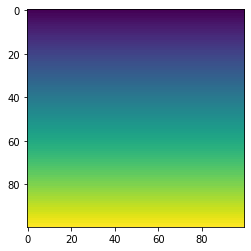

In [50]:
# x축, y축 만들기
xx, yy = np.mgrid[0:1:0.01, 0:1:0.01]
print(xx.shape, yy.shape)
xx
plt.imshow(xx)

(10000, 2)


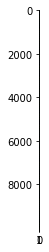

In [51]:
# xx, yy로 가진 배열 만들기
grid = np.c_[xx.flatten(), yy.flatten()]
print(grid.shape)
plt.imshow(grid)

In [52]:
# 우리가 만든 모델로 예측하기
# x축; grid값 (2500개)
# h = model.predict_proba(grid)
h = model.predict(grid)


print(type(h))
print(h.shape)
print(h[0:5])

<class 'numpy.ndarray'>
(10000, 1)
[[0.3684678 ]
 [0.3688085 ]
 [0.36914927]
 [0.36949018]
 [0.3698311 ]]


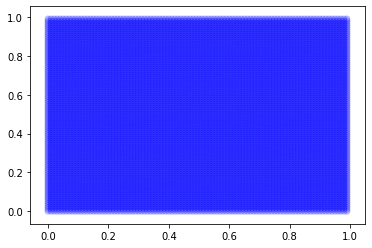

In [53]:
colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  
# plt.savefig('xor.png')

# 3. 더 깊은 신경망

In [59]:
# 다층 신경망
model = Sequential()
model.add(Dense(5, input_dim = 2))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('sigmoid'))
model.add(Dense(7))
model.add(Activation('sigmoid'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary(0)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 5)                 15        
_________________________________________________________________
activation_23 (Activation)   (None, 5)                 0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                60        
_________________________________________________________________
activation_24 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 7)                 77        
_________________________________________________________________
activation_25 (Activation)   (None, 7)                 0         
_________________________________________________________________
dense_26 (Dense)             (None, 1)               

In [60]:
model.compile(loss = 'binary_crossentropy', optimizer= 'adam')

In [66]:
model.fit(X, y, batch_size=4, epochs=3000, verbose=0)


In [67]:
p = model.predict(X)

#### 예측 데이터 만들어서 예측 + plot 그리기

(2500, 2)
<class 'numpy.ndarray'>
(2500, 1)


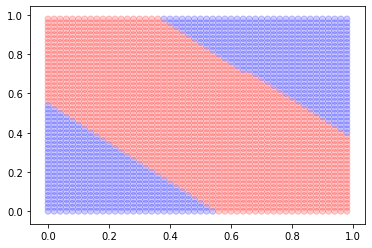

In [68]:
xx, yy = np.mgrid[0:1:0.02, 0:1:0.02]
grid = np.c_[xx.flatten(), yy.flatten()]
print(grid.shape)
h = model.predict_proba(grid)

print(type(h))
print(h.shape)

colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)

# 4. 더더더 깊은 신경망

In [76]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

In [77]:
# 다층 신경망
model = Sequential([
        Dense(5, input_dim = 2),
        Activation('sigmoid'),
        Dense(10),
        Activation('sigmoid'),
        Dense(10),
        Activation('sigmoid'),
        Dense(10),
        Activation('sigmoid'),
        Dense(7),
        Activation('sigmoid'),
        Dense(1),
        Activation('sigmoid')
])

In [78]:
model.compile(loss = 'binary_crossentropy', optimizer= 'adam')

In [79]:
model.fit(X, y, batch_size=4, epochs=3000, verbose=0)


In [82]:
p = model.predict(X)
p

array([[0.00537589],
       [0.6664823 ],
       [0.6663756 ],
       [0.6665479 ]], dtype=float32)

#### 예측 데이터 만들어서 예측 + plot 그리기

(2500, 2)
<class 'numpy.ndarray'>
(2500, 1)


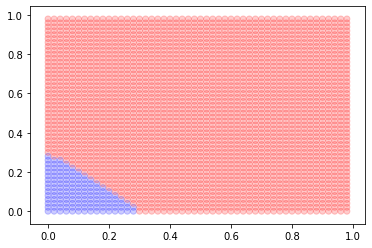

In [83]:
xx, yy = np.mgrid[0:1:0.02, 0:1:0.02]
grid = np.c_[xx.flatten(), yy.flatten()]
print(grid.shape)
h = model.predict_proba(grid)

print(type(h))
print(h.shape)

colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)

- 레이어가 깊어질수록 값이 다르게 나옴

> 돌파구
- 깊어질수록 성능이 안좋을까?
- sigmoid banish문제
- 깊어질수록 앞 레이어만 학습이 됨.
- 초기값이 랜덤이므로, 학습이 될 수도 있고, 안될수도 있음.


> 오차 역전파
- 뒤에서부터 미분하면서 w값을 업그레이드 하면서 오기
- 단층 레이어는 미선형함수로 해결할 수 없다-> 다층으로 해결하자
- 